<a href="https://colab.research.google.com/github/Sushilchankapure/Sushilchankapure/blob/main/IQ_Pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting a child iq from their mothers features using Machine Learning Algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('kid_iq.csv')
df2 = pd.read_csv('child_iq.csv')

In [3]:
df1

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27
...,...,...,...,...,...,...
429,430,94,0,84.877412,4,21
430,431,76,1,92.990392,4,23
431,432,50,0,94.859708,2,24
432,433,88,1,96.856624,2,21


In [4]:
df2

,Unnamed: 0,ppvt,educ_cat,momage
0,1,120,2,21
1,2,89,1,17
2,3,78,2,19
3,4,42,1,20
4,5,115,4,26
...,...,...,...,...
395,396,87,3,21
396,397,69,2,20
397,398,80,1,25
398,399,98,1,18


In [5]:
df1 = df1.drop('Unnamed: 0' , axis = 1 )
df2 = df2.drop('Unnamed: 0', axis = 1)

In [6]:
df1.shape

(434, 5)

In [7]:
df2.shape

(400, 3)

In [8]:
df1.columns

Index(['kid_score', 'mom_hs', 'mom_iq', 'mom_work', 'mom_age'], dtype='object')

In [9]:
df2.columns

Index(['ppvt', 'educ_cat', 'momage'], dtype='object')

In [10]:
df1.duplicated().sum()

1

In [11]:
df2.duplicated().sum()

50

In [12]:
df2 = df2.drop_duplicates()

In [13]:
df1.isnull().sum()

kid_score    0
mom_hs       0
mom_iq       0
mom_work     0
mom_age      0
dtype: int64

In [14]:
df2.isnull().sum()

ppvt        0
educ_cat    0
momage      0
dtype: int64

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ppvt      350 non-null    int64
 1   educ_cat  350 non-null    int64
 2   momage    350 non-null    int64
dtypes: int64(3)
memory usage: 10.9 KB


In [17]:
df1.describe()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000,2.896313,22.785714
std,20.410688,0.410799,15.000000,1.181394,2.701070
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.272742,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


In [18]:
df2.describe()

,ppvt,educ_cat,momage
count,350.000000,350.000000,350.000000
mean,86.351429,2.128571,22.802857
std,21.127243,0.855145,2.756289
min,20.000000,1.000000,17.000000
25%,73.000000,2.000000,21.000000
50%,89.000000,2.000000,23.000000
75%,102.000000,3.000000,25.000000
max,144.000000,4.000000,29.000000


In [19]:
df1.nunique()

kid_score     85
mom_hs         2
mom_iq       332
mom_work       4
mom_age       13
dtype: int64

In [20]:
df2.nunique()

ppvt        84
educ_cat     4
momage      13
dtype: int64

Discrete Variables: ['mom_hs', 'mom_work', 'mom_age']
Continous Variables: ['kid_score', 'mom_iq']


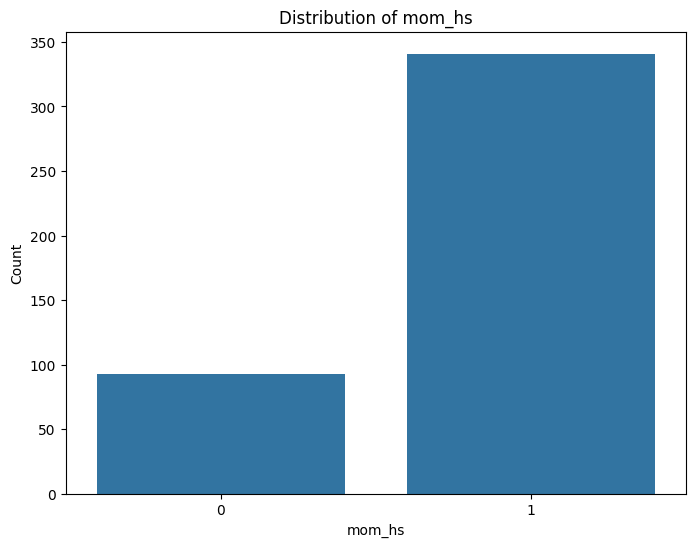

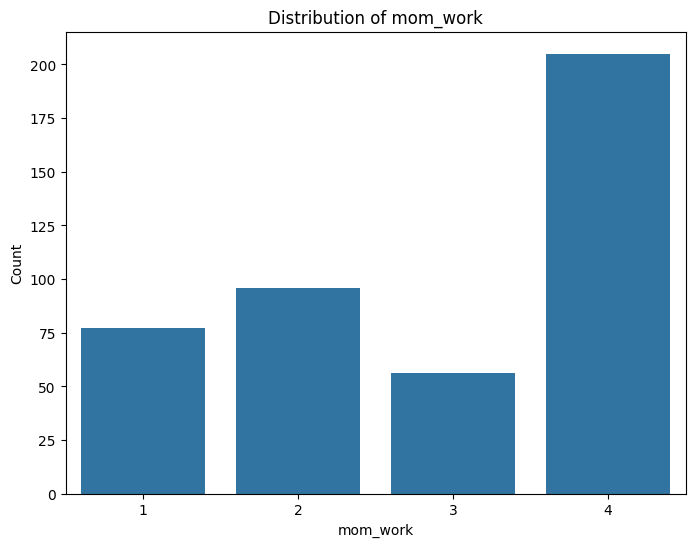

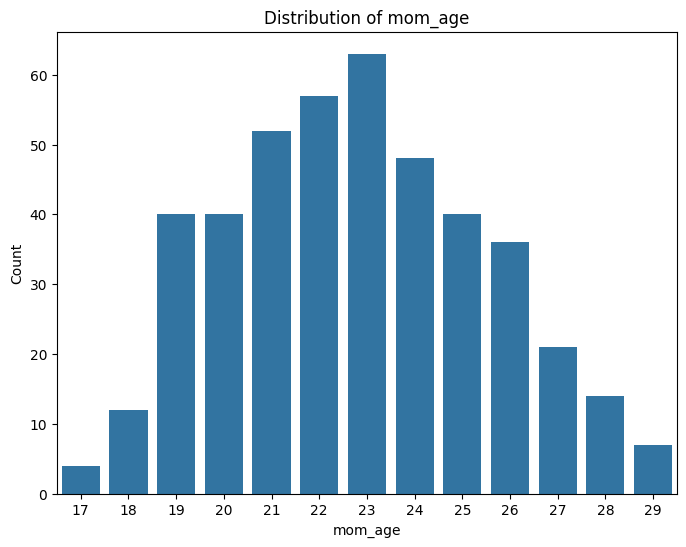

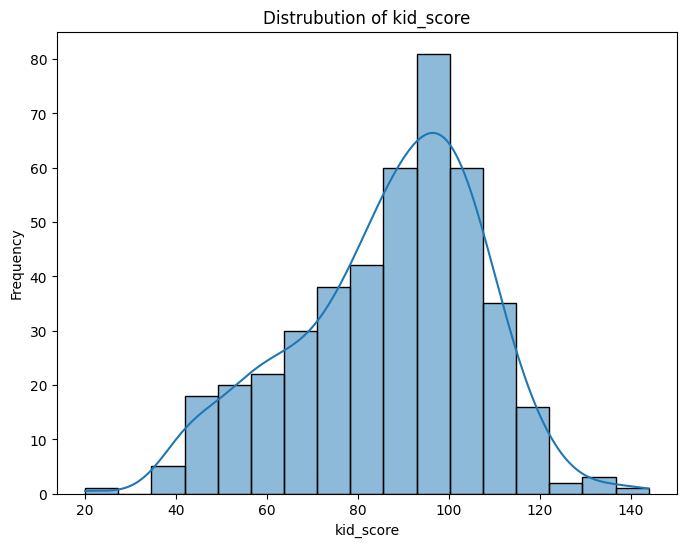

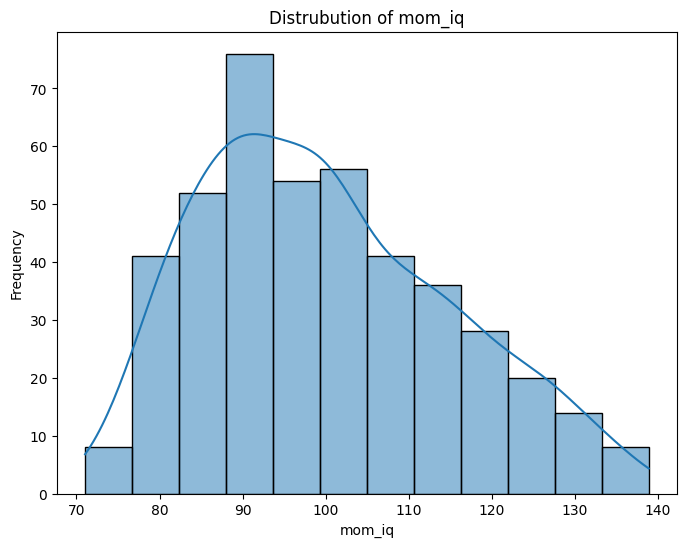

In [24]:
discrete_vars = []
continuous_vars = []
for column in df1.columns:
  unique_values = df1[column].nunique()
  total_values = df1.shape[0]
  if unique_values / total_values < 0.05 or unique_values < 10 :
    discrete_vars.append(column)
  else:
    continuous_vars.append(column)
print('Discrete Variables:', discrete_vars)
print('Continous Variables:', continuous_vars)

for var in discrete_vars:
  plt.figure(figsize=(8,6))
  sns.countplot(x=var, data=df1)
  plt.title(f'Distribution of {var}')
  plt.xlabel(var)
  plt.ylabel('Count')
  plt.show()


for var in continuous_vars:
  plt.figure(figsize=(8,6))
  sns.histplot(df1[var], kde=True)
  plt.title(f'Distrubution of {var}')
  plt.xlabel(var)
  plt.ylabel('Frequency')
  plt.show()

Discrete Variables: ['educ_cat', 'momage']
Continuous Variables: ['ppvt']


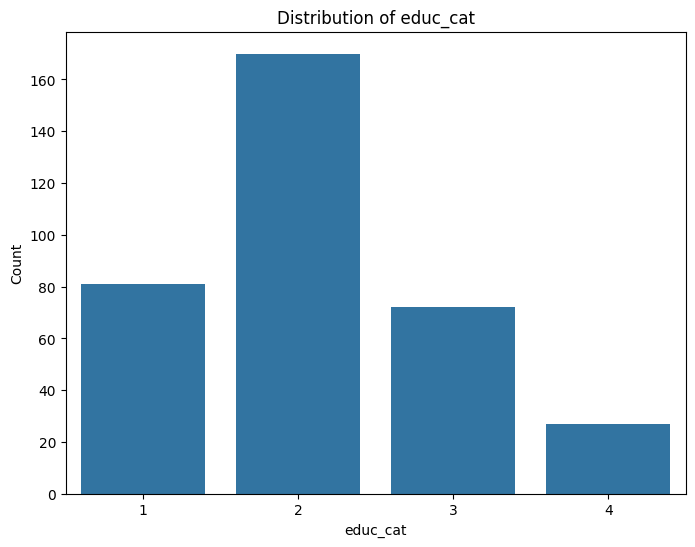

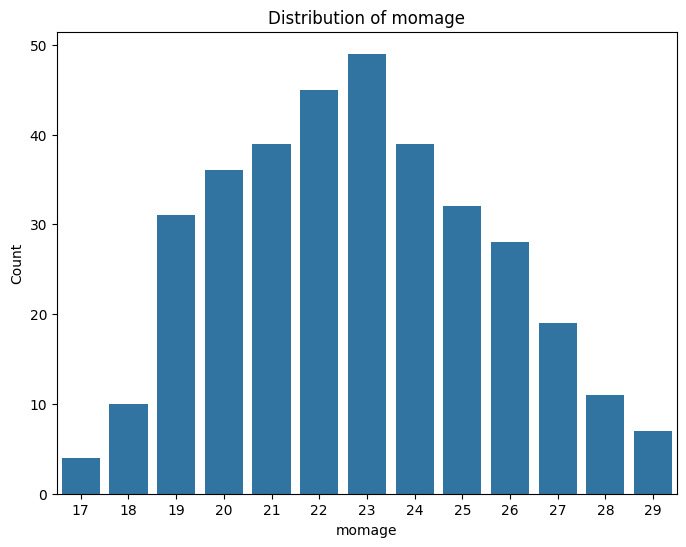

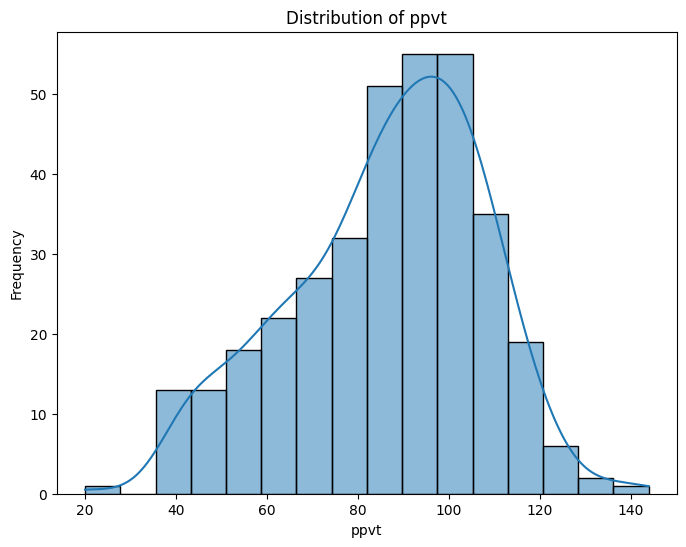

In [25]:
discrete_vars = []
continuous_vars = []

for column in df2.columns:
  unique_values = df2[column].nunique()
  total_values = df2.shape[0]
  if unique_values / total_values < 0.05 or unique_values < 10 :
    discrete_vars.append(column)
  else:
    continuous_vars.append(column)
print('Discrete Variables:', discrete_vars)
print('Continuous Variables:', continuous_vars)

for var in discrete_vars:
  plt.figure(figsize=(8,6))
  sns.countplot(x=var, data=df2)
  plt.title(f'Distribution of {var}')
  plt.xlabel(var)
  plt.ylabel('Count')
  plt.show()

for var in continuous_vars:
  plt.figure(figsize=(8,6))
  sns.histplot(df2[var], kde=True)
  plt.title(f'Distribution of {var}')
  plt.xlabel(var)
  plt.ylabel('Frequency')
  plt.show()

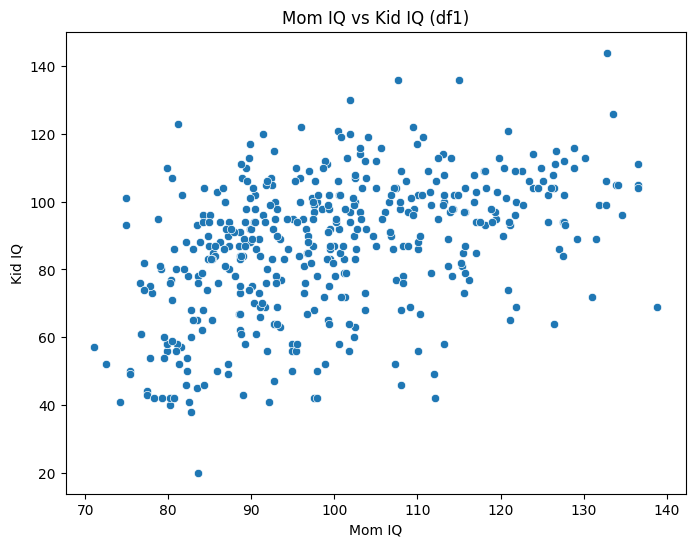

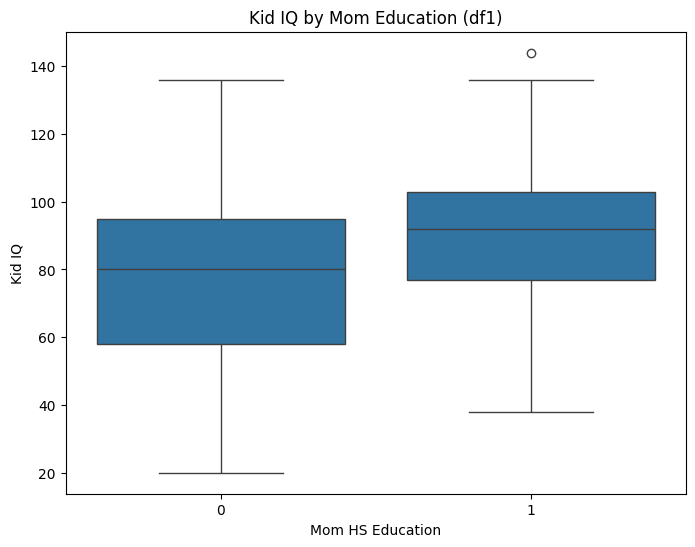

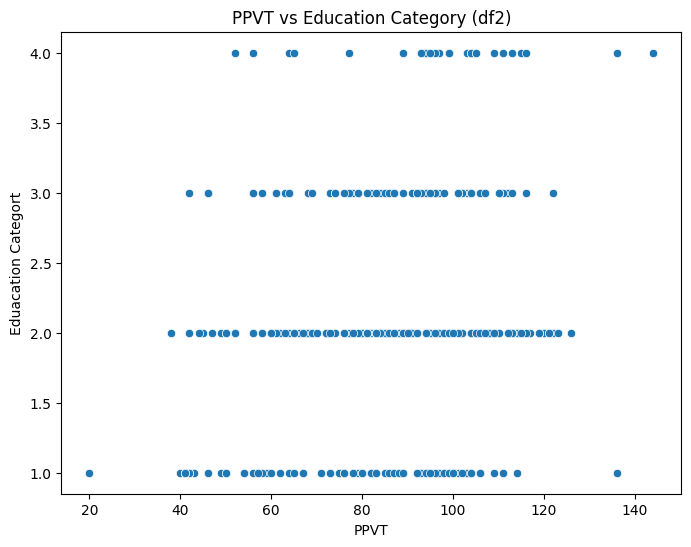

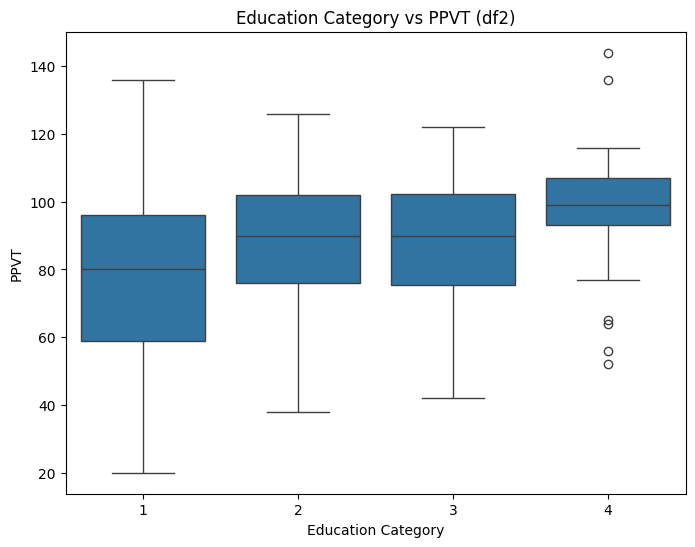

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='mom_iq', y='kid_score', data=df1)
plt.title('Mom IQ vs Kid IQ (df1)')
plt.xlabel('Mom IQ')
plt.ylabel('Kid IQ')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='mom_hs', y='kid_score', data=df1)
plt.title('Kid IQ by Mom Education (df1)')
plt.xlabel('Mom HS Education')
plt.ylabel('Kid IQ')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='ppvt', y='educ_cat', data=df2)
plt.title('PPVT vs Education Category (df2)')
plt.xlabel('PPVT')
plt.ylabel('Eduacation Categort')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='educ_cat', y='ppvt', data=df2)
plt.title('Education Category vs PPVT (df2)')
plt.xlabel('Education Category')
plt.ylabel('PPVT')
plt.show()

In [31]:
pivot_tabel_df1 = pd.pivot_table(df1, index='mom_hs', values='kid_score', aggfunc='mean')
print('Pivot Tabel for df1:')
pivot_tabel_df1

Pivot Tabel for df1:


,kid_score
mom_hs,
0,77.548387
1,89.319648


In [32]:
pivot_table_df2 = pd.pivot_table(df2, index= 'educ_cat', values='ppvt', aggfunc='mean')
print('\nPivot Table for df2:')
pivot_table_df2


Pivot Table for df2:


,ppvt
educ_cat,
1,77.913580
2,88.058824
3,87.694444
4,97.333333


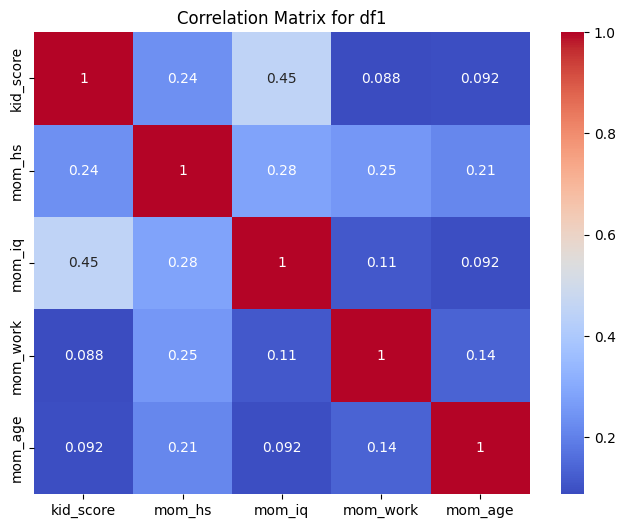

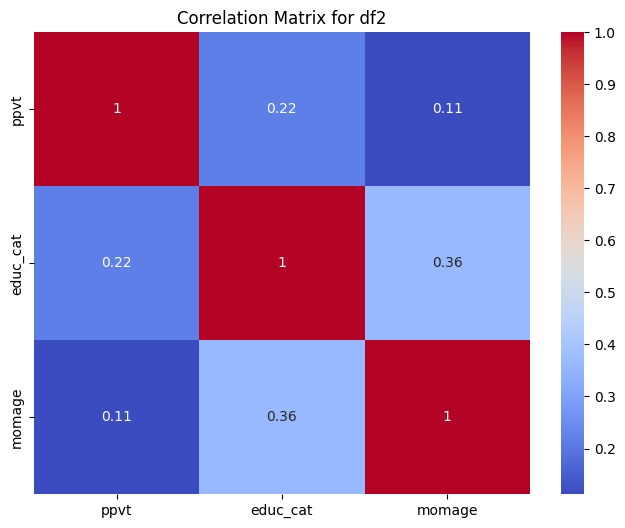

In [34]:
correlation_matrix_df1 = df1.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_df1, annot=True, cmap='coolwarm') # Changed 'Correlation_matrix_df1' to 'correlation_matrix_df1'
plt.title('Correlation Matrix for df1')
plt.show()

correlation_matrix_df2 = df2.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_df2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for df2')
plt.show()

In [35]:
df2.rename(columns={'momage': 'mom_age'}, inplace=True)


In [36]:
merged_df = pd.merge(df1, df2, on='mom_age', how='inner')

In [37]:
merged_df

,kid_score,mom_hs,mom_iq,mom_work,mom_age,ppvt,educ_cat
0,65,1,121.117529,4,27,84,2
1,65,1,121.117529,4,27,101,3
2,65,1,121.117529,4,27,109,4
3,65,1,121.117529,4,27,82,3
4,65,1,121.117529,4,27,113,4
...,...,...,...,...,...,...,...
15253,102,1,127.675717,4,29,107,2
15254,102,1,127.675717,4,29,104,4
15255,102,1,127.675717,4,29,107,3
15256,102,1,127.675717,4,29,108,2


In [38]:
merged_df.duplicated().sum()

49

In [39]:
merged_df.isnull().sum()

kid_score    0
mom_hs       0
mom_iq       0
mom_work     0
mom_age      0
ppvt         0
educ_cat     0
dtype: int64

In [40]:
merged_df.shape

(15258, 7)

In [41]:
merged_df.columns

Index(['kid_score', 'mom_hs', 'mom_iq', 'mom_work', 'mom_age', 'ppvt',
       'educ_cat'],
      dtype='object')

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
X = merged_df.drop('kid_score', axis=1)
y = merged_df['kid_score']

In [44]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

In [51]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-Squared:', r2_score(y_test, y_pred))

Mean Squared Error: 318.2541539902318
R-Squared: 0.21317436602745166


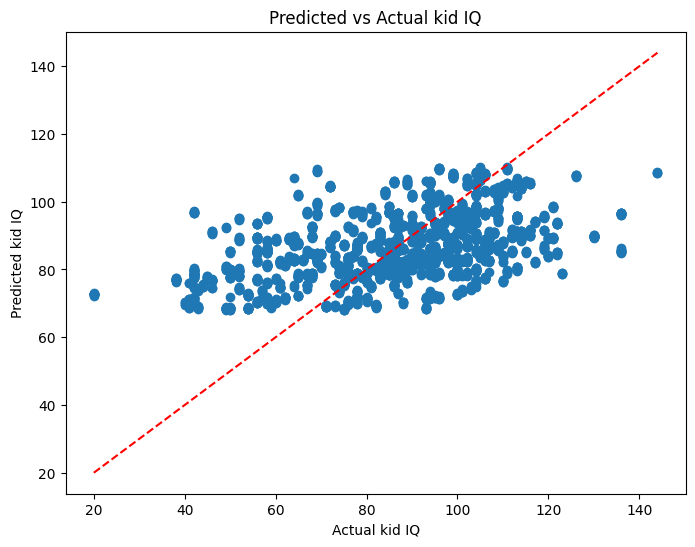

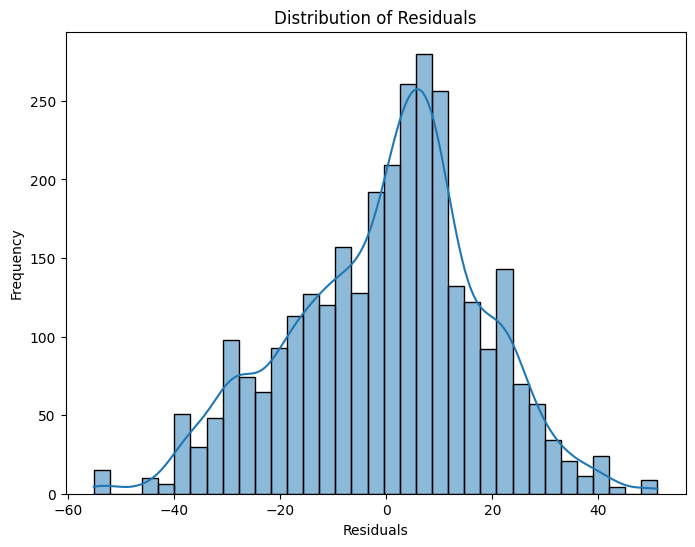

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Predicted vs Actual kid IQ')
plt.xlabel('Actual kid IQ')
plt.ylabel('Predicted kid IQ')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [55]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
y_pred_dt = dt_regressor.predict(X_test)

In [57]:
print('Decision Tree Regressor:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_dt))
print('R-squared', r2_score(y_test, y_pred_dt))

Decision Tree Regressor:
Mean Squared Error: 70.5099115334207
R-squared 0.8256770409811057


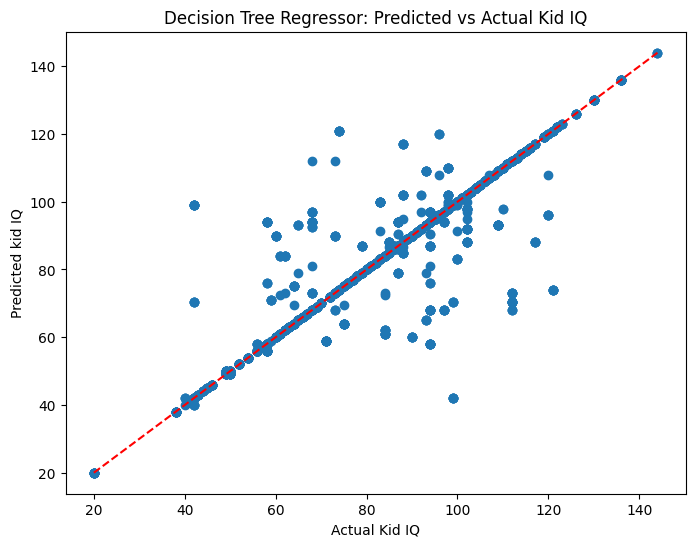

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Decision Tree Regressor: Predicted vs Actual Kid IQ')
plt.xlabel('Actual Kid IQ')
plt.ylabel('Predicted kid IQ')
plt.show()

In [59]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
y_pred_rf= rf_regressor.predict(X_test)

In [64]:
print('\nRandom Forest Regressor:')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


Random Forest Regressor:
Mean Squared Error: 49.40881627797085
R-squared: 0.8778456692416313


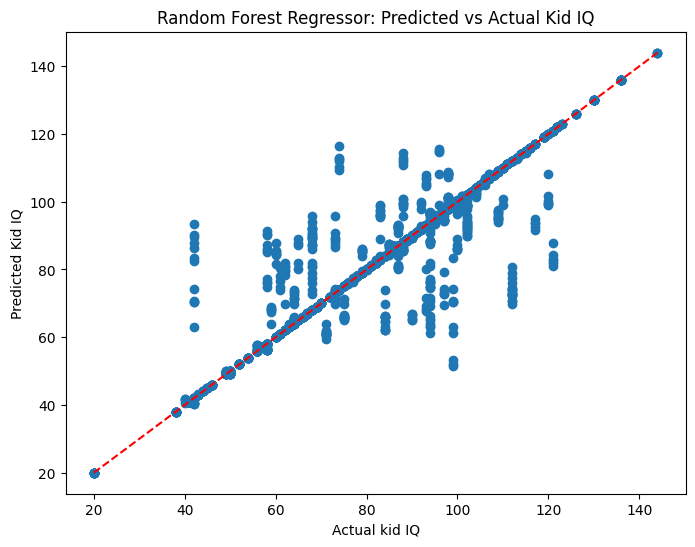

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Random Forest Regressor: Predicted vs Actual Kid IQ')
plt.xlabel('Actual kid IQ')
plt.ylabel('Predicted Kid IQ')
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [70]:
y_pred_scaled = model.predict(X_test_scaled)

In [72]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_scaled))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 318.2541539902318
R-squared: 0.8778456692416313


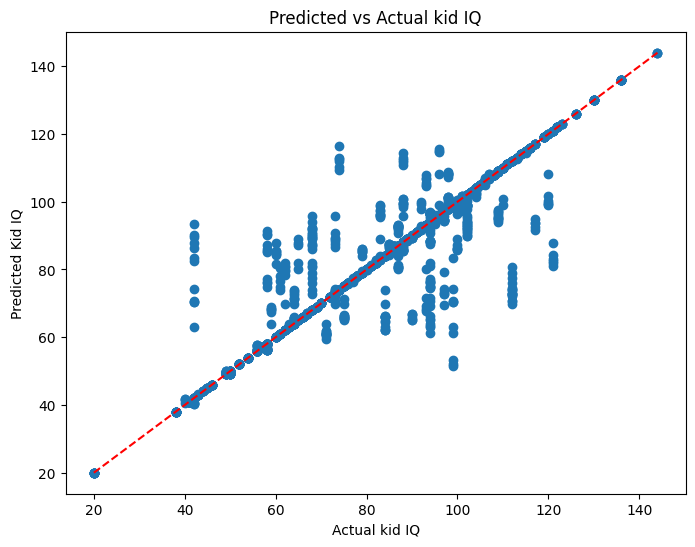

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Predicted vs Actual kid IQ')
plt.xlabel('Actual kid IQ')
plt.ylabel('Predicted Kid IQ')
plt.show()